<a href="https://colab.research.google.com/github/stephiioo/datasci_5_statistics/blob/main/data_sci_5_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### the dataset used is related to mental health and sense of fufillment in life. it analyzes the potential for happiness based on different criterias including criminal rates, healthy life expectancy, social support, and other criterias

In [1]:
# install necessary libraries

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
# load in dataset

happiness = pd.read_csv('/content/WHR2023.csv')
happiness

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110


In [3]:
# check for missing values

missing_values = happiness.isna().sum()

# calculate the percentage of missing values
percentage_missing = (missing_values / len(happiness)) * 100

# Display of the results
print("Missing Values:")
print(missing_values)
print("\nPercent of Missing Values:")
print(percentage_missing)

Missing Values:
Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

Percent of Missing Values:
Country name                   

In [4]:
# Remove duplicate rows
happiness_no_duplicates = happiness.drop_duplicates()

# Check for duplicate columns
duplicate_columns = happiness_no_duplicates.columns[happiness_no_duplicates.columns.duplicated()]

# Remove duplicate columns
happiness_no_duplicate_columns = happiness_no_duplicates[happiness_no_duplicates.columns[~happiness_no_duplicates.columns.duplicated()]]

In [5]:
# Clean the column names
happiness.columns = happiness.columns.str.lower()
happiness.columns = happiness.columns.str.strip()
happiness.columns = happiness.columns.str.replace(' ', '_')
happiness.columns = happiness.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Print the updated column names
print(happiness.columns)

Index(['country_name', 'ladder_score', 'standard_error_of_ladder_score',
       'upperwhisker', 'lowerwhisker', 'logged_gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'ladder_score_in_dystopia',
       'explained_by_log_gdp_per_capita', 'explained_by_social_support',
       'explained_by_healthy_life_expectancy',
       'explained_by_freedom_to_make_life_choices', 'explained_by_generosity',
       'explained_by_perceptions_of_corruption', 'dystopia__residual'],
      dtype='object')


In [6]:
happiness.describe()

,ladder_score,standard_error_of_ladder_score,upperwhisker,lowerwhisker,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by_log_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption,dystopia__residual
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,137.000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,136.000000
mean,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838
std,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956,0.000,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000,1.778,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000,1.555250
50%,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000,1.778,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000,1.848500
75%,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000,1.778,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


## **research question for chi-square:** is there a significant asscoiation between what country one lives in and their ability to meet various happiness criterias?

### **null hypothesis:** there is no significant asscoiation between what country one lives in and their ability to meet various happiness criterias

### **alternative hypothesis:** there is a significant asscoiation between what country one lives in and their ability to meet various happiness criterias

In [7]:
# create a contingency table

happiness = pd.DataFrame({
    'social_support': [0.919, 0.812, 0.740], # Observed counts of social_support by countries
    'freedom_to_make_life_choices': [0.800, 0.717, 0.718], # Observed counts of freedom_to_make_life_choices by countries
    'healthy_life_expectancy': [65.850,73.650, 54.891] # Observed counts of healthy_life_expectancy by countries
}, index=['United States', 'South Korea', 'Nigeria'])

display(happiness)

# conduct a chi square test
chi2, p, dof, expected = chi2_contingency(happiness)

display(chi2, p, dof, expected)


# interprete the results
if p < 0.05:
    print("There is a significant association between country and achieving hapiness criterias.")
else:
    print("There is no significant association between country and achieving hapiness criterias.")


,social_support,freedom_to_make_life_choices,healthy_life_expectancy
United States,0.919,0.800,65.850
South Korea,0.812,0.717,73.650
Nigeria,0.740,0.718,54.891


0.06003073278178028

0.9995584520764659

4

array([[ 0.83860128,  0.75850824, 65.97189048],
       [ 0.93304926,  0.84393569, 73.40201504],
       [ 0.69934946,  0.63255607, 55.01709448]])

There is no significant association between country and achieving hapiness criterias.


## **interpretation of chi-square analysis**


### three criterias for happiness were analyzed by countries (United States, South Korea, and Nigeria). the results showed that these crietrias for hapiness were not directly related to the country people live in.

### this chi-square analysis shows that the country one lives in does not directly affect their potential to be happy.

### this means that there are other factors to consider that affects the potential that people have to live happy and fulfilling lives. One common factor that many people can agree on is income. People with higher income tend to have a greater potential to achieve happiness and fulfilment.

### this is due to the resources that people have access to by being a a certain tax bracket


## **research question for t-test:** is there a significant asscoiation between healthy life expectancy and living in a first world country vs living in a third world country?

### **null hypothesis:** there is no significant asscoiation between healthy life expectancy and living in a first world country vs living in a third world country

### **alternative hypothesis:** there is a significant asscoiation between healthy life expectancy and living in a first world country vs living in a third world country

In [8]:
# prepare data

## compare healthy_life_expectancy of three first world countries labelled as group_a and three third world countries called group_b

# group_a = united states, south korea, united kingdom, and france
# group_b = nigeria, mexico, ghana, and india
group_a = [65.850, 73.650, 70.300, 72.300]
group_b = [54.891, 65.800, 58.763, 60.777]

display(group_a, group_b)

# perform t-test
t_statistic, p_value = stats.ttest_ind(group_a, group_b)

display(t_statistic, p_value)

# interprete the results
if p_value < 0.05:
    print("There is a significant difference between the means of Group A and Group B.")
else:
    print("There is no significant difference between the means of Group A and Group B.")


[65.85, 73.65, 70.3, 72.3]

[54.891, 65.8, 58.763, 60.777]

3.6876000041595014

0.01023785262695404

There is a significant difference between the means of Group A and Group B.


## **interpretation of t-test**

### this t-test analysis was conducted to see if healthy life expectancy varies between people in first world countries and people in third world countries. the results of it showed that people in first world countries tend to have a higher healthy life expectancy that people in third world countries. this could be attributed to reasons such as access to healthcare, nutrition, clean water and sanitation, access to medications and vaccines etc

## **research question for ANOVA:** is there a signifcant different between

## **research question for ANOVA:** is there a significant asscoiation in healthy life expectancy bewtween living in a first world country compared to living a second world counry and living in a third world country?

### **null hypohesis:** there is not a significant asscoiation in healthy life expectancy bewtween living in a first world country compared to living a second world counry and living in a third world country

### **alternative hypothesis:** there is a significant asscoiation in healthy life expectancy bewtween living in a first world country compared to living a second world counry and living in a third world country

In [9]:
# prepare data

## compare healthy_life_expectancy of three first world countries (group_a), three second world countries (group_b), and three third world countries (group_c)

# group_a = united states, south korea, united kingdom, and france
# group_b = vietnam, russia, hungary, czechia
# group_c = nigeria, mexico, ghana, and india

group_a = [65.850, 73.650, 70.300, 72.300]
group_b = [65,502, 64.947, 67.500, 69.050]
group_c = [54.891, 65.800, 58.763, 60.777]


display(group_a, group_b, group_c)

f_statistic, p_value = stats.f_oneway(group_a, group_b, group_c)

display(f_statistic, p_value)

if p_value < 0.05:
    print("There is a significant difference in healthy life expectancy bewtween living in a first world country compared to living a second world counry and living in a third world country")
else:
    print("There is no significant difference in healthy life expectancy bewtween living in a first world country compared to living a second world counry and living in a third world country")


[65.85, 73.65, 70.3, 72.3]

[65, 502, 64.947, 67.5, 69.05]

[54.891, 65.8, 58.763, 60.777]

0.7996120225604175

0.4762722897106844

There is no significant difference in healthy life expectancy bewtween living in a first world country compared to living a second world counry and living in a third world country


## **interpretation of ANOVA**

### this data is a build upon on the analysis conducted with the t-test. since ANOVA is used to determine whether there are significant differences between the means of three or more groups.

### the purpose of this analysis was to see if there is a significant difference between in healthy life expectancy between living in a first world country vs living in a second world country and living in a third world country

### the results showed that there is no significant difference in healthy life expectancy between living in a first world country compared to living in a second world country and living in a third world country

### this can be attributed to the fact that "scond world country" is an outdated classification that was used during the Cold War to describe countries that were aligned with the Soviet Union and socialist or communist in nature. These countries were in contrast to the "First World" (capitalist and Western-aligned countries) and the "Third World" (countries that were unaligned or non-aligned). Nowadays, this term does not necessarily reflect the current status or political alignments of these countries nor does it reflect the the heaalthcare situation

### "second world countries" are generally just as capable of providing their citizens with appropriate healthcare resource that will allow for them to have a health life expectancy.

## **regression analysis:**

### **research question:** will maximum heart rate during exercise have an effect on one's ppotential to have exercise angina?

#### **null hypothesis:** maximum heart rate during exercise will have not an effect on one's potential to have exercise angina

#### **alternative hypothesis:** maximum heart rate during exercise will have an effect on one's potential to have exercise angina



In [10]:
# load in necessary packages

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [11]:
# load in dataset

angina = pd.read_csv('/content/heart.csv')
angina

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
# check for missing values

missing_values = angina.isna().sum()

# calculate the percentage of missing values
percentage_missing = (missing_values / len(angina)) * 100

# Display of the results
print("Missing Values:")
print(missing_values)
print("\nPercent of Missing Values:")
print(percentage_missing)

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Percent of Missing Values:
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


In [13]:
# Remove duplicate rows
angina_no_duplicates = angina.drop_duplicates()

# Check for duplicate columns
duplicate_columns = angina_no_duplicates.columns[angina_no_duplicates.columns.duplicated()]

# Remove duplicate columns
angina_no_duplicate_columns = angina_no_duplicates[angina_no_duplicates.columns[~angina_no_duplicates.columns.duplicated()]]

In [14]:
# Clean the column names
angina.columns = angina.columns.str.lower()
angina.columns = angina.columns.str.strip()
angina.columns = angina.columns.str.replace(' ', '_')
angina.columns = angina.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Print the updated column names
print(angina.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [15]:
angina.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Mean Squared Error: 0.17474531255073641
R-squared (R²): 0.20703986829110965


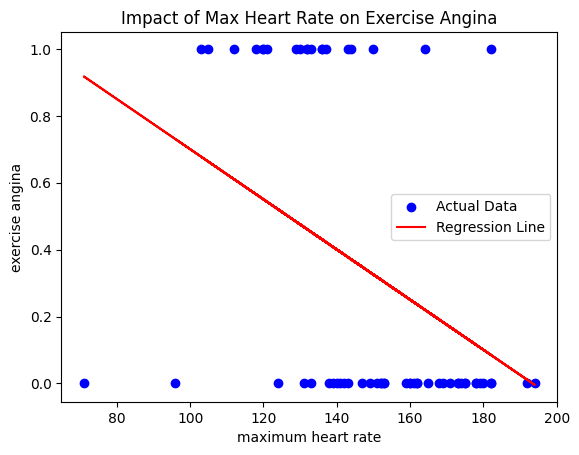

In [16]:
# separate the independent variable (X) and the dependent variable (y)
X = angina[['thalach']]
y = angina['exang']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R²): {r2}")

# Plot the regression line
plt.scatter(X_test, y_test, color='b', label='Actual Data')
plt.plot(X_test, y_pred, color='r', label='Regression Line')
plt.xlabel('maximum heart rate')
plt.ylabel('exercise angina')
plt.title('Impact of Max Heart Rate on Exercise Angina')
plt.legend()
plt.show()

## **interpretation of regression analysis:**

### the regression line has a negative slope and poor fit.

### the negative regression line indicates that negative regression line as the maximum heasrt rate increases, the exercise induced angina tends to decrease. This suggests an inverse relationship between the two variables.

### as for poor fit, the regression line is "barely touching" the data which suggests that the model is a poor fit for the data. The data points are not well explained by the linear relationship modeled by the regression line.

### R² is the coefficient of determination. A value of R² = 0.20703986829110965 indicates that approximately 20.7% of the variance in the dependent variable (exercise angina) is explained by the independent variable (maximum heart rate) in the regression model. This means that the model is not explaining a large portion of the variance in the data.